In [4]:
import os
# running from Root directory
os.chdir("..")

In [16]:
from connectome import calculate_cell_type_conn_matrix,calculate_cell_type_synapse_dist_to_soma,calculate_cell_type_synapse_attr
from connectome_types import ClfType, SynapseDirection, m_types, cell_types
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import plotly.express as px
clf_type_space = [e.value for e in ClfType]

## Connectivity matrix

In [6]:
def plot_cell_type_conn_matrix(z, labels, title, text_inside=False):
    c = plt.imshow(z, cmap ='YlOrRd') 
    plt.colorbar(c) 
    plt.title(f'{title}', fontweight ="bold") 
    
    plt.xticks(ticks=np.arange(len(labels)), labels=labels,  rotation=90)
    plt.yticks(ticks=np.arange(len(labels)), labels=labels)

    if text_inside:
        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                plt.text(j, i, f'{z[i, j]:.2f}', ha='center', va='center', color='black')
        
    plt.show() 

In [7]:
mtype_output_mat = calculate_cell_type_conn_matrix('mtype', m_types, SynapseDirection.output)
mtype_input_mat = calculate_cell_type_conn_matrix('mtype', m_types, SynapseDirection.input)

In [8]:
celltype_output_mat = calculate_cell_type_conn_matrix('cell_type', cell_types, SynapseDirection.output)
celltype_input_mat = calculate_cell_type_conn_matrix('cell_type', cell_types, SynapseDirection.input)

In [9]:
clftype_output_mat = calculate_cell_type_conn_matrix('clf_type', clf_type_space, SynapseDirection.output)
clftype_input_mat = calculate_cell_type_conn_matrix('clf_type', clf_type_space, SynapseDirection.input)

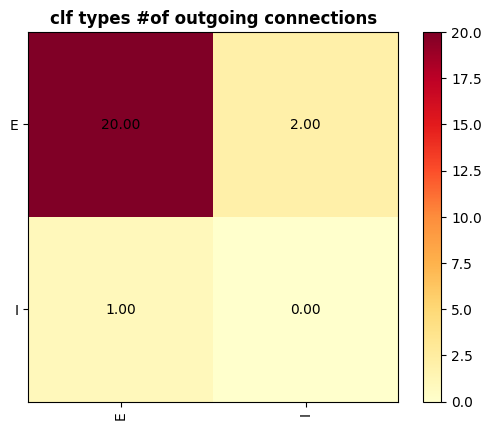

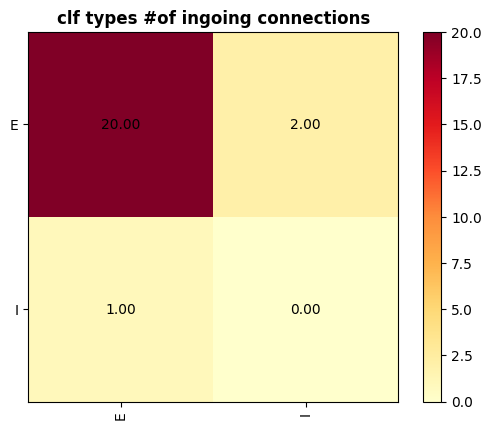

In [10]:
plot_cell_type_conn_matrix(clftype_output_mat, clf_type_space, 'clf types #of outgoing connections', True)
plot_cell_type_conn_matrix(clftype_input_mat, clf_type_space, 'clf types #of ingoing connections', True)

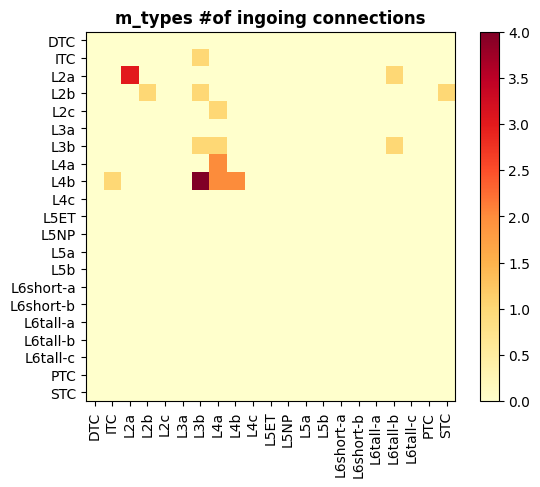

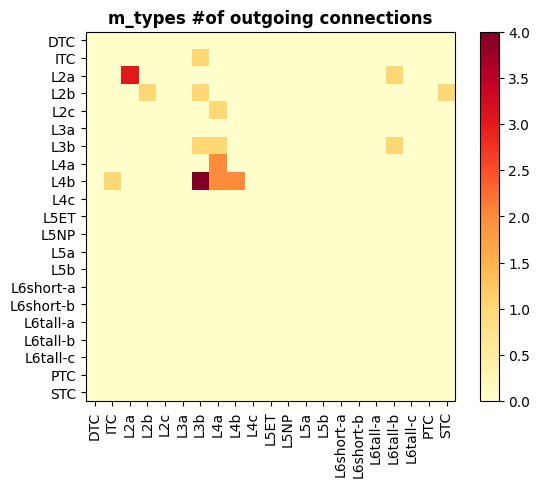

In [11]:
plot_cell_type_conn_matrix(mtype_input_mat, m_types, 'm_types #of ingoing connections')
plot_cell_type_conn_matrix(mtype_output_mat, m_types, 'm_types #of outgoing connections')

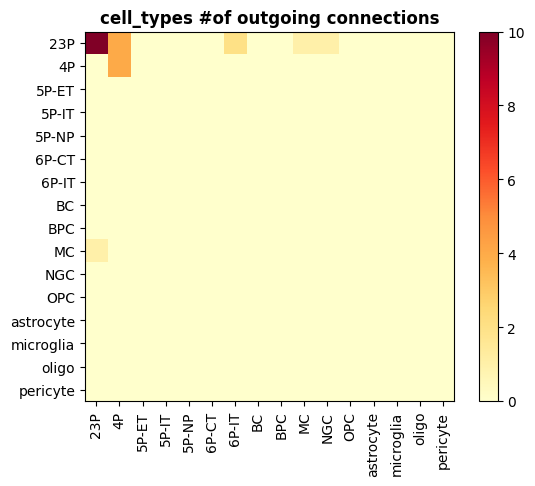

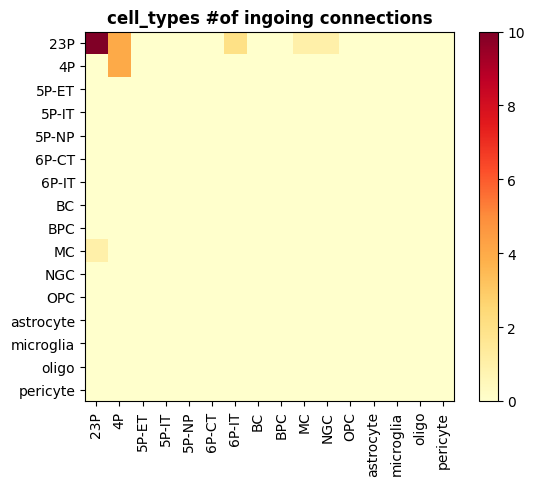

In [12]:
plot_cell_type_conn_matrix(celltype_output_mat, cell_types, 'cell_types #of outgoing connections')
plot_cell_type_conn_matrix(celltype_input_mat, cell_types, 'cell_types #of ingoing connections')

## Synapse attributes

In [58]:
celltype_input_syn_sizes = calculate_cell_type_synapse_attr('cell_type', cell_types, SynapseDirection.input, 'size')
celltype_input_syn_dist_to_soma = calculate_cell_type_synapse_dist_to_soma('cell_type', cell_types, SynapseDirection.input)

In [56]:
def plot_cell_type_syn_attr(keys_subset, syn_data, title, legend_title, x_label):
    for key in syn_data:
        if key not in keys_subset:
            continue
        if syn_data[key]:
            values = [t[1] for t in syn_data[key]]
            plt.hist(values, bins=10, alpha=0.5, label=key)
    
    plt.ylabel('Frequency'); plt.xlabel(x_label); plt.title(title); plt.legend(title=legend_title); plt.show()

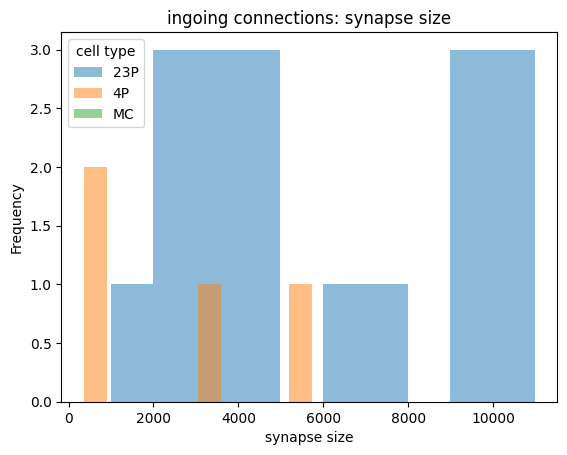

In [64]:
keys_subset = ['4P', 'MC']
plot_cell_type_syn_attr(keys_subset=cell_types,
                        syn_data=celltype_input_syn_sizes,
                        title='ingoing connections: synapse size',
                        legend_title='cell type',
                        x_label='synapse size'
                       )

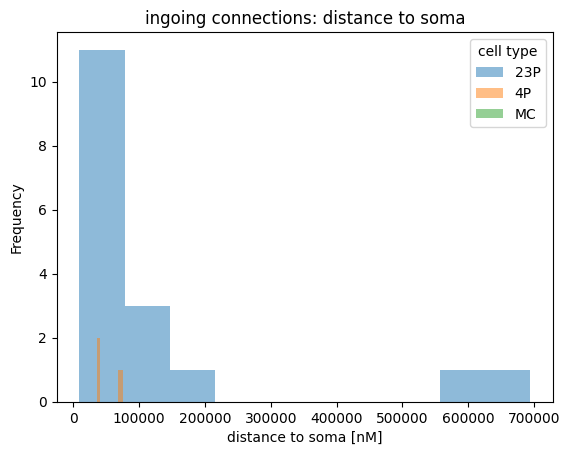

In [65]:
plot_cell_type_syn_attr(keys_subset=cell_types,
                        syn_data=celltype_input_syn_dist_to_soma,
                        title='ingoing connections: distance to soma',
                        legend_title='cell type',
                        x_label='distance to soma [nM]'
                       )